In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Data loading

In [2]:
train = pd.read_pickle("./data/train.pkl")
test = pd.read_pickle("./data/test.pkl")

train_DL = pd.read_pickle("./data/train_DL.pkl")
test_DL = pd.read_pickle("./data/test_DL.pkl")
val_DL = pd.read_pickle("./data/validate_DL.pkl")

In [3]:
def load_data(train, test):
    train_X = np.array(train.loc[:,~train.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    train_Y = np.array(train.pIC50)
    test_X = np.array(test.loc[:,~test.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    test_Y = np.array(test.pIC50)

    return train_X, train_Y, test_X, test_Y

def load_data_DL(train_DL, test_DL, val_DL):
    train_X = np.array(train_DL.loc[:,~train_DL.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    train_Y = np.array(train_DL.pIC50)
    test_X = np.array(test_DL.loc[:,~test_DL.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    test_Y = np.array(test_DL.pIC50)
    val_X = np.array(val_DL.loc[:,~val_DL.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    val_Y = np.array(val_DL.pIC50)

    return train_X, train_Y, test_X, test_Y, val_X, val_Y

In [4]:
def root_mean_squared_error(test_y, pred_y):
    return np.sqrt(mean_squared_error(test_y, pred_y))

In [5]:
def evaluate(train_Y, pred_Y_train, test_Y, pred_Y_test):
    print("Train Root Mean Squared Error:", root_mean_squared_error(train_Y, pred_Y_train))
    print("Train Mean Absolute Error:", mean_absolute_error(train_Y, pred_Y_train))
    print("Train R2:", r2_score(train_Y, pred_Y_train))
    print('\n')
    print("Test Root Mean Squared Error:", mean_squared_error(test_Y, pred_Y_test))
    print("Test Mean Absolute Error:", mean_absolute_error(test_Y, pred_Y_test))
    print("Test R2:", r2_score(test_Y, pred_Y_test))
    print('\n')

In [6]:
def visualizeTrainTest(train_Y, pred_Y_train, test_Y, pred_Y_test):
    fig, axs = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(10)

    pred_pairs_train = {key: value for key, value in zip(train_Y, pred_Y_train)}
    # pred_pairs_train = dict(sorted(pred_pairs_train.items()))
    pred_pairs_test = {key: value for key, value in zip(test_Y, pred_Y_test)}
    # pred_pairs_test = dict(sorted(pred_pairs_test.items()))


    axs[0].set_title("Train predictions")
    axs[0].plot(pred_pairs_train.values(), color="darkblue", label='predictions')
    axs[0].plot(pred_pairs_train.keys(), '.', color="red", label='true data', markersize=5)
    axs[0].set_xlabel("Molecules")
    axs[0].set_ylabel("pIC50")
    axs[0].legend()
    axs[0].grid()

    axs[1].set_title("Test predictions")
    axs[1].plot(pred_pairs_test.values(), color="darkblue", label='predictions')
    axs[1].plot(pred_pairs_test.keys(), '.', color="red", label='true data', markersize=5)
    axs[1].set_xlabel("Molecules")
    axs[1].set_ylabel("pIC50")
    axs[1].legend()
    axs[1].grid()

    fig.tight_layout()
    plt.show()

### Random Forest

Train Root Mean Squared Error: 0.05643081739839587
Train Mean Absolute Error: 0.04309316771909702
Train R2: 0.9271804598421313


Test Root Mean Squared Error: 0.03332890810472897
Test Mean Absolute Error: 0.14456842076139712
Test R2: 0.3257503173173305




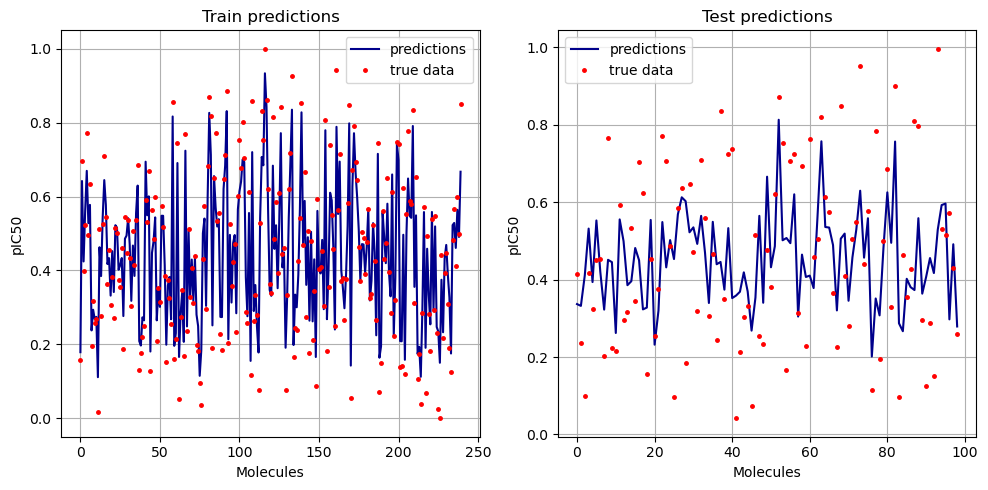

In [97]:
from sklearn.ensemble import RandomForestRegressor

## Fitting

train_X, train_Y, test_X, test_Y,= load_data(train, test)
forest = RandomForestRegressor(random_state=0)
forest.fit(train_X, train_Y)

## Predictions

pred_Y_train_forest = forest.predict(train_X)
pred_Y_test_forest = forest.predict(test_X)
evaluate(train_Y, pred_Y_train_forest, test_Y, pred_Y_test_forest)

## Visualization

visualizeTrainTest(train_Y, pred_Y_train_forest, test_Y, pred_Y_test_forest)


ABC 0.00012568831058162102
ABCGG 0.007857209946681308
nAtom 3.9889955363096566e-05
nHeavyAtom 2.0936097307512333e-05
nH 3.838761634318971e-05
nC 0.00010288917533635794
ATS0dv 8.834145073810571e-05
ATS1dv 2.764373851839283e-05
ATS2dv 0.0005074982610729764
ATS3dv 0.00019249590488475284
ATS4dv 0.0002854367369474999
ATS5dv 0.00033548706030909716
ATS6dv 0.0011742447323506745
ATS7dv 0.0018529824388909468
ATS8dv 0.00045030506213406414
ATS0d 0.00038244176448747486
ATS1d 0.0004821940704946889
ATS2d 0.0003103611320435601
ATS3d 5.555220678243295e-05
ATS4d 0.000924797633267506
ATS5d 0.0003329572251539675
ATS6d 0.0007114124539095081
ATS7d 0.000442408120386471
ATS8d 7.080174023924409e-05
ATS0Z 0.00010704381003160792
ATS1Z 4.917559033210759e-05
ATS2Z 9.309359610607882e-05
ATS3Z 0.00038830558579635606
ATS4Z 0.001732538720725592
ATS5Z 0.0005296555470214125
ATS6Z 0.0018427291475399752
ATS7Z 0.00025960194696009463
ATS8Z 5.627460058009164e-05
ATS0m 0.000588606663419253
ATS1m 0.00013186489574605687
ATS2m 5

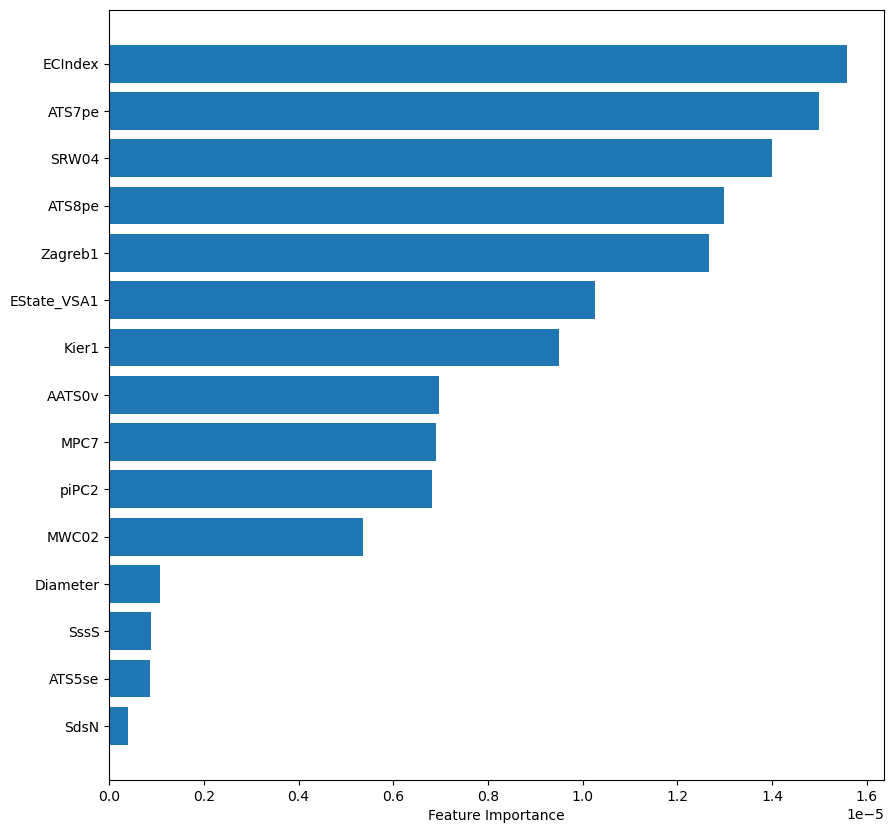

In [101]:
for feature, importance in zip(np.array(train_DL.loc[:,~train.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])].columns), forest.feature_importances_):    
    print(feature, importance)
    feature_importance[feature] += importance

forest_sort = forest.feature_importances_.argsort()

plt.figure(figsize=(10,10))
plt.barh(np.array(train_DL.loc[:,~train.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])].columns)[forest_sort][:15], 
         forest.feature_importances_[forest_sort][:15])
plt.xlabel("Feature Importance")
plt.show()

In [41]:
max(forest.feature_importances_)

0.06359434844764719

### SVM

Train Root Mean Squared Error: 0.1042846457217426
Train Mean Absolute Error: 0.0867279157089955
Train R2: 0.7513113354627016


Test Root Mean Squared Error: 0.03338377536486693
Test Mean Absolute Error: 0.1455252130164125
Test R2: 0.3246403429784941




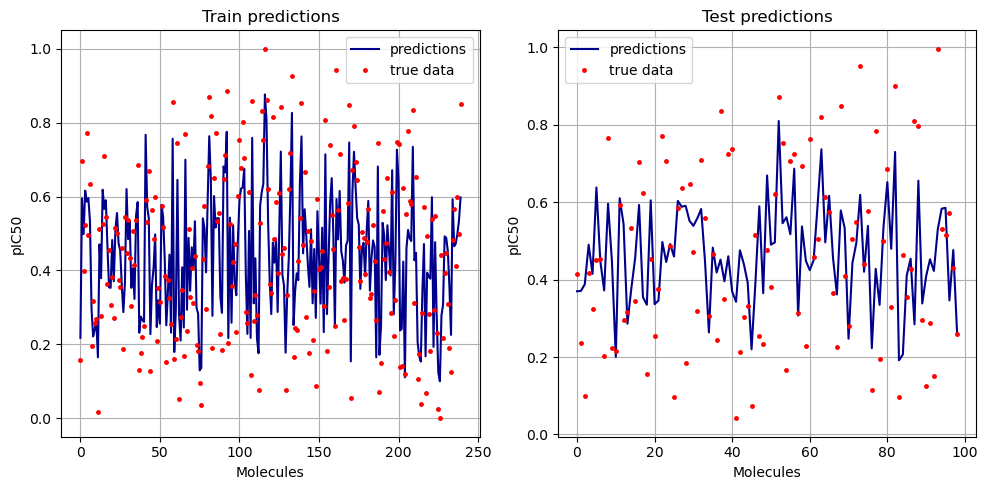

In [102]:
from sklearn.svm import SVR

rain_X, train_Y, test_X, test_Y = load_data(train, test)

## Fitting

svm = SVR()
svm.fit(train_X, train_Y)

## Predictions

pred_Y_train_svm = svm.predict(train_X)
pred_Y_test_svm = svm.predict(test_X)
evaluate(train_Y, pred_Y_train_svm, test_Y, pred_Y_test_svm)

## Visualization

visualizeTrainTest(train_Y, pred_Y_train_svm, test_Y, pred_Y_test_svm)

### DNN

In [70]:
from keras.models import Sequential
from keras.layers import Dense

train_X, train_Y, test_X, test_Y = load_data(train, test)

## Building the model

DNN = Sequential()
DNN.add(Dense(128, kernel_initializer='normal', input_dim = train_X.shape[1], activation='relu'))
DNN.add(Dense(256, kernel_initializer='normal',activation='relu'))
DNN.add(Dense(128, kernel_initializer='normal',activation='relu'))
DNN.add(Dense(1, kernel_initializer='normal',activation='linear'))

## Compiling

DNN.compile(loss='mse', optimizer='adam', metrics=['mse'])
DNN.summary()

/home/teeder/miniconda3/envs/PROJEKT_dipl/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 128)            │       107,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,825 (679.00 KB)

 Trainable params: 173,825 (679.00 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
from sklearn.model_selection import  KFold
avg_train_loss = []
avg_val_loss = []


N_EPOCHS = 200

for n_epoch in range(N_EPOCHS):
    print('\nEPOCH ', n_epoch+1, '-----------------------------------------------------------------------')
    folds = list(KFold(n_splits=3, shuffle=True, random_state=0).split(train_X, train_Y))
    train_loss = []; train_acc = []
    val_loss = []; val_acc = []

    for j, (train_idx, val_idx) in enumerate(folds):
        print('\nEpoch ', n_epoch, 'Fold ',j)
        X_train_cv = train_X[train_idx]
        y_train_cv = train_Y[train_idx]
        X_valid_cv = train_X[val_idx]
        y_valid_cv = train_Y[val_idx]

        DNN.fit(X_train_cv, y_train_cv, batch_size=64, epochs=1, validation_data=(X_valid_cv, y_valid_cv))
        train_loss.append(DNN.history.history['loss'])
        val_loss.append(DNN.history.history['val_loss'])
    
    avg_train_loss.append(np.average(train_loss))
    avg_val_loss.append(np.average(val_loss))
    print(f'Epoch {n_epoch} - val_loss: {avg_val_loss[-1]}\n')


EPOCH  1 -----------------------------------------------------------------------

Epoch  0 Fold  0
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - loss: 0.1642 - mse: 0.1642 - val_loss: 0.0597 - val_mse: 0.0597

Epoch  0 Fold  1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0466 - val_mse: 0.0466

Epoch  0 Fold  2
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 0.0498 - mse: 0.0498 - val_loss: 0.0540 - val_mse: 0.0540
Epoch 0 - val_loss: 0.05342443039019903


EPOCH  2 -----------------------------------------------------------------------

Epoch  1 Fold  0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0552 - val_mse: 0.0552

Epoch  1 Fold  1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0342 - val_mse: 0.0342

Epoch  1 Fold  2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0394 - mse: 0.0394 - val_loss: 0.0381 - val_mse: 0.0381
Epoch 1 - val_loss: 0.042475142826636635


EPOCH  3 ---------

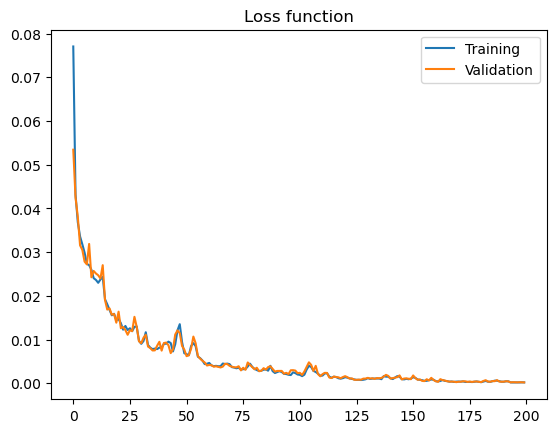

In [72]:
plt.plot(avg_train_loss, label='Training')
plt.plot(avg_val_loss, label='Validation')
plt.title('Loss function')
plt.legend()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Train Root Mean Squared Error: 0.011544007883599064
Train Mean Absolute Error: 0.00873368964127392
Train R2: 0.9969526069036556


Test Root Mean Squared Error: 0.03617645887258871
Test Mean Absolute Error: 0.1452351664466311
Test R2: 0.26814386361596243




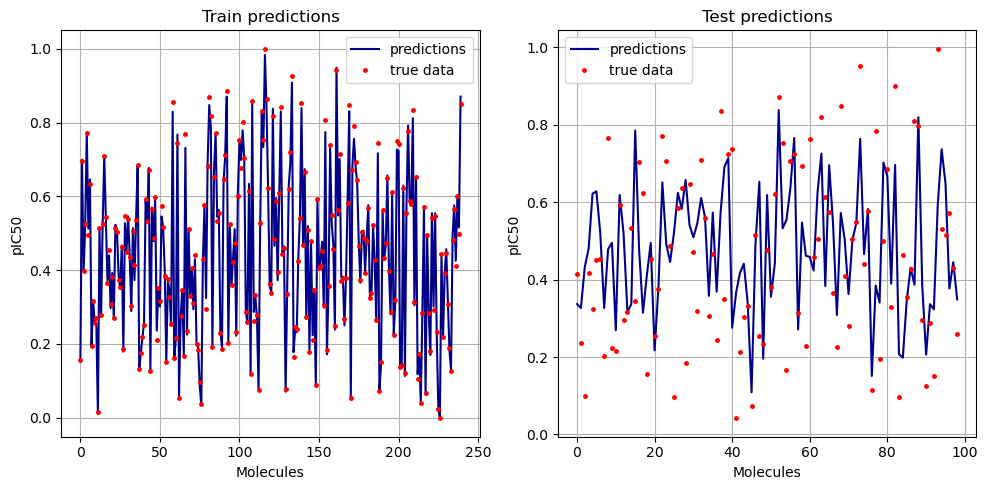

In [73]:
pred_Y_train_dnn = DNN.predict(train_X)
pred_Y_test_dnn = DNN.predict(test_X)
evaluate(train_Y, pred_Y_train_dnn, test_Y, pred_Y_test_dnn)
visualizeTrainTest(train_Y, pred_Y_train_dnn, test_Y, pred_Y_test_dnn)

### ARD

Train Root Mean Squared Error: 0.08506675879452663
Train Mean Absolute Error: 0.06546629762443618
Train R2: 0.8345239973073957


Test Root Mean Squared Error: 0.04418589026456685
Test Mean Absolute Error: 0.17199084670842194
Test R2: 0.10611165549379997




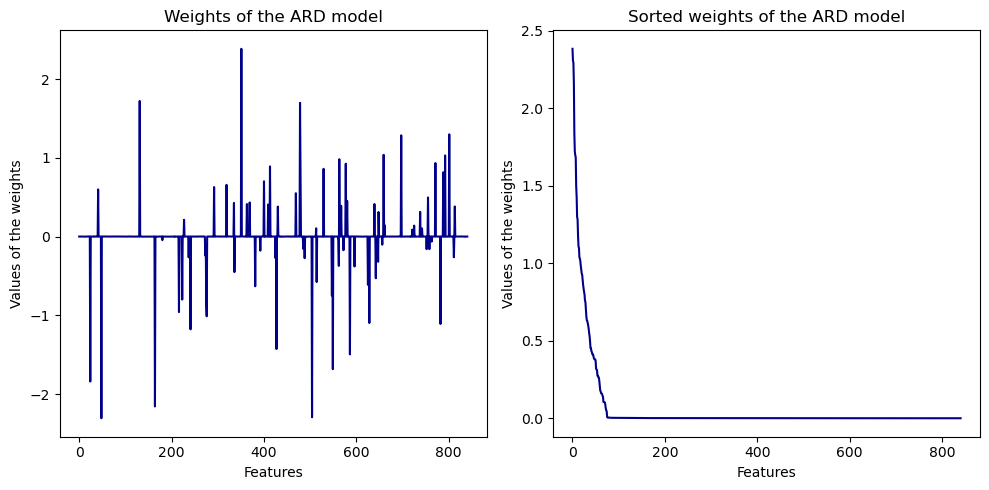

In [74]:
from sklearn import linear_model

train_X, train_Y, test_X, test_Y = load_data(train, test)

ard = linear_model.ARDRegression()
ard.fit(train_X, train_Y)

pred_Y_train_ard = ard.predict(train_X)
pred_Y_test_ard = ard.predict(test_X)
evaluate(train_Y, pred_Y_train_ard, test_Y, pred_Y_test_ard)

fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)

axs[0].set_title("Weights of the ARD model")
axs[0].plot(ard.coef_, color="darkblue")
axs[0].set_xlabel("Features")
axs[0].set_ylabel("Values of the weights")

axs[1].set_title("Sorted weights of the ARD model")
axs[1].plot(sorted(np.abs(ard.coef_),reverse=True), color="darkblue")
axs[1].set_xlabel("Features")
axs[1].set_ylabel("Values of the weights")

fig.tight_layout()
plt.show()

Knee at: 75	 Treshold:  0.007207703308010799


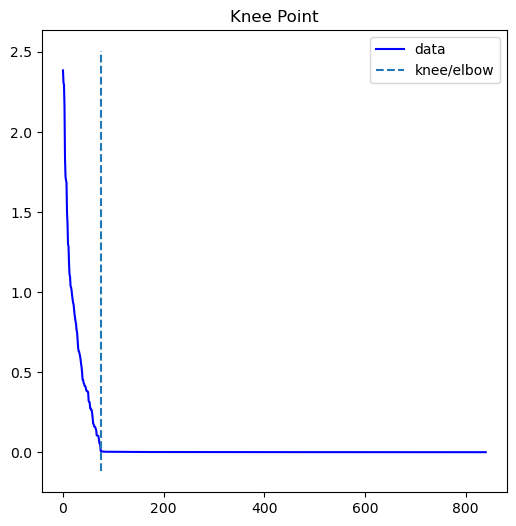

In [76]:
#Simple module to find the knee in a series
from kneed import KneeLocator

kneedle = KneeLocator(list(range(len(ard.coef_))), sorted(np.abs(ard.coef_), reverse=True), S=50, curve='convex', direction='decreasing')
print(f'Knee at: {kneedle.knee}\t Treshold: ',kneedle.knee_y)
kneedle.plot_knee()

In [77]:
mask = abs(ard.coef_) > kneedle.knee_y

cols = np.array(train_DL.loc[:,~train.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])].columns)[mask]
vals = ard.coef_[mask]
feature_weights = {key: value for key, value in zip(cols, vals)}
sorted_feature_weights = sorted(feature_weights.items(), key=lambda x:abs(x[1]), reverse=True)

print(len(feature_weights))
sorted_feature_weights


75


[('AATSC4p', 2.384655560851829),
 ('ATS6v', -2.3079078327764364),
 ('GATS2p', -2.2957238173640095),
 ('AATS4p', -2.1580759372146243),
 ('ATS0Z', -1.840999609488105),
 ('AATS3v', 1.7220052303368403),
 ('GATS4v', 1.6977418684591181),
 ('WNSA1', -1.6842902046304868),
 ('Xpc-6dv', -1.4967227883059067),
 ('MATS2p', -1.4285065285520253),
 ('GGI9', 1.2981928571679588),
 ('MIC3', 1.285409066467888),
 ('ATSC2pe', -1.1787312503844085),
 ('piPC8', -1.1102887755259694),
 ('Mse', -1.0982578973739197),
 ('fMF', 1.0379997992625762),
 ('TopoPSA', 1.0302161755481143),
 ('AATSC1c', -1.012632540933365),
 ('TASA', 0.9820588354457556),
 ('ATSC4m', -0.9590471384297425),
 ('MPC8', 0.933593533427102),
 ('Xc-3dv', 0.9250180018348729),
 ('MATS2pe', 0.8911890506905937),
 ('PPSA1', 0.8603555142026029),
 ('AATSC0c', -0.8372668238640655),
 ('RotRatio', 0.8165149589012372),
 ('ATSC2v', -0.8003466013016052),
 ('GATS5v', 0.7608126791846077),
 ('FPSA4', -0.7497085659121193),
 ('MATS3v', 0.7017740534602536),
 ('AATSC4v'

### ARD + DNN

In [78]:
train_X, train_Y, test_X, test_Y = load_data(train_DL, test_DL)

ard = linear_model.ARDRegression()
ard.fit(train_X, train_Y)

kneedle = KneeLocator(list(range(len(ard.coef_))), sorted(np.abs(ard.coef_), reverse=True), S=50, curve='convex', direction='decreasing')
mask = abs(ard.coef_) > kneedle.knee_y
train_X = train_X[:,mask]
test_X = test_X[:,mask]

## Building the model

DNN_ARD = Sequential()
DNN_ARD.add(Dense(128, kernel_initializer='normal', input_dim = train_X.shape[1], activation='relu'))
DNN_ARD.add(Dense(256, kernel_initializer='normal',activation='relu'))
DNN_ARD.add(Dense(128, kernel_initializer='normal',activation='relu'))
DNN_ARD.add(Dense(1, kernel_initializer='normal',activation='linear'))

## Compiling

DNN_ARD.compile(loss='mse', optimizer='adam', metrics=['mse'])
DNN_ARD.summary()

/home/teeder/miniconda3/envs/PROJEKT_dipl/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 128)            │         9,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,649 (295.50 KB)

 Trainable params: 75,649 (295.50 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
avg_train_loss = []
avg_val_loss = []


N_EPOCHS = 200

for n_epoch in range(N_EPOCHS):
    print('\nEPOCH ', n_epoch+1, '-----------------------------------------------------------------------')
    folds = list(KFold(n_splits=3, shuffle=True, random_state=0).split(train_X, train_Y))
    train_loss = []; train_acc = []
    val_loss = []; val_acc = []

    for j, (train_idx, val_idx) in enumerate(folds):
        print('\nEpoch ', n_epoch, 'Fold ',j)
        X_train_cv = train_X[train_idx]
        y_train_cv = train_Y[train_idx]
        X_valid_cv = train_X[val_idx]
        y_valid_cv = train_Y[val_idx]

        DNN_ARD.fit(X_train_cv, y_train_cv, batch_size=64, epochs=1, validation_data=(X_valid_cv, y_valid_cv))
        train_loss.append(DNN_ARD.history.history['loss'])
        val_loss.append(DNN_ARD.history.history['val_loss'])
    
    avg_train_loss.append(np.average(train_loss))
    avg_val_loss.append(np.average(val_loss))
    print(f'Epoch {n_epoch} - val_loss: {avg_val_loss[-1]}\n')


EPOCH  1 -----------------------------------------------------------------------

Epoch  0 Fold  0
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 446ms/step - loss: 0.2344 - mse: 0.2344 - val_loss: 0.0924 - val_mse: 0.0924

Epoch  0 Fold  1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0837 - mse: 0.0837 - val_loss: 0.0595 - val_mse: 0.0595

Epoch  0 Fold  2
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 361ms/step - loss: 0.0685 - mse: 0.0685 - val_loss: 0.0551 - val_mse: 0.0551
Epoch 0 - val_loss: 0.06901416306694348


EPOCH  2 -----------------------------------------------------------------------

Epoch  1 Fold  0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0507 - mse: 0.0507 - val_loss: 0.0479 - val_mse: 0.0479

Epoch  1 Fold  1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0527 - mse: 0.0527 - val_loss: 0.0437 - val_mse: 0.0437

Epoch  1 Fold  2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0482 - val_mse: 0.0482
Epoch 1 - val_loss: 0.04658418148756027


EPOCH  3 ----------

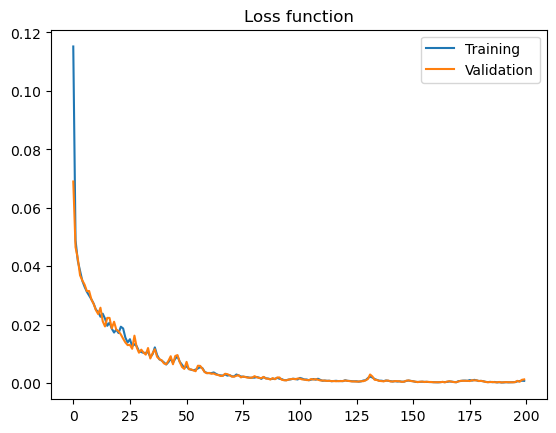

In [80]:
plt.plot(avg_train_loss, label='Training')
plt.plot(avg_val_loss, label='Validation')
plt.title('Loss function')
plt.legend()
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Train Root Mean Squared Error: 0.046051678937469885
Train Mean Absolute Error: 0.03819774976369459
Train R2: 0.9523100281326519


Test Root Mean Squared Error: 0.038082052747773903
Test Mean Absolute Error: 0.15270786804198974
Test R2: 0.24322734638576882




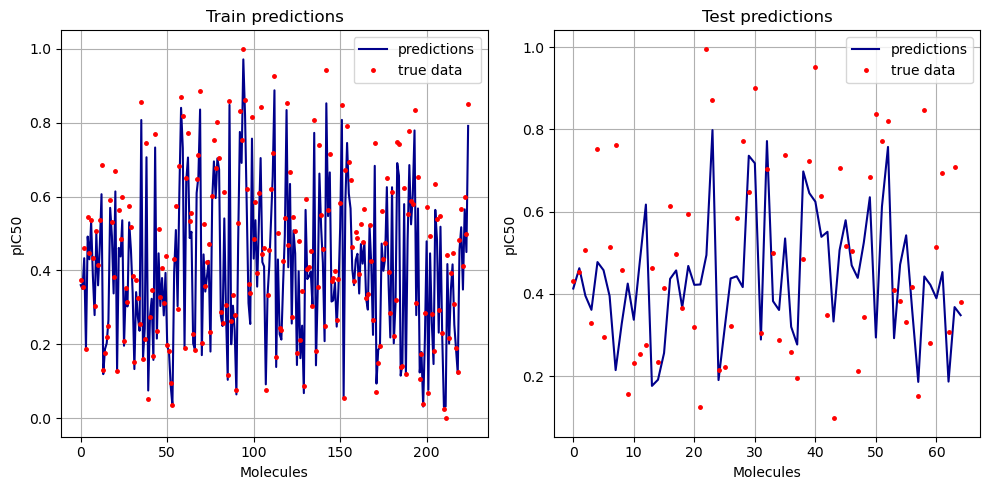

In [81]:
pred_Y_train_dnn_ard = DNN_ARD.predict(train_X)
pred_Y_test_dnn_ard = DNN_ARD.predict(test_X)
evaluate(train_Y, pred_Y_train_dnn_ard, test_Y, pred_Y_test_dnn_ard)
visualizeTrainTest(train_Y, pred_Y_train_dnn_ard, test_Y, pred_Y_test_dnn_ard)

### Linear regression

Train Root Mean Squared Error: 8.960302322616858e-15
Train Mean Absolute Error: 7.02555758179961e-15
Train R2: 1.0


Test Root Mean Squared Error: 0.1726987987574033
Test Mean Absolute Error: 0.3116612383673907
Test R2: -2.4318981982731986




/tmp/ipykernel_9166/3623938304.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[0].plot(pred_pairs_train.values(), 'o', color="red", label='true data', marker=".", markersize=5)
/tmp/ipykernel_9166/3623938304.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[1].plot(pred_pairs_test.values(), 'o', color="red", label='true data', marker=".", markersize=5)


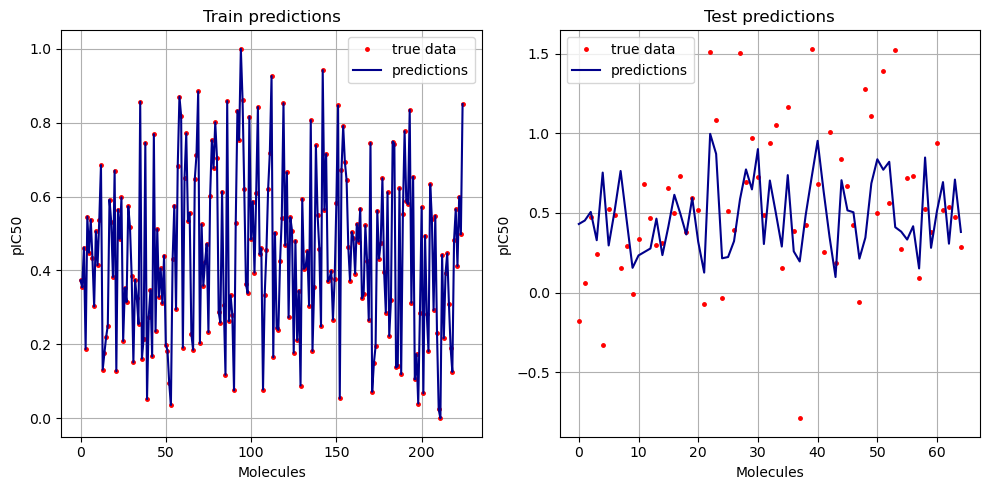

In [16]:
from sklearn.linear_model import LinearRegression

train_X, train_Y, test_X, test_Y = load_data(train_DL, test_DL)

lr = LinearRegression()
lr.fit(train_X, train_Y)

pred_Y_train_lr = lr.predict(train_X)
pred_Y_test_lr = lr.predict(test_X)

evaluate(train_Y, pred_Y_train_lr, test_Y, pred_Y_test_lr)
visualizeTrainTest(train_Y, pred_Y_train_lr, test_Y, pred_Y_test_lr)


### Ridge regression

In [35]:
from sklearn.linear_model import Ridge

train_X, train_Y, test_X, test_Y = load_data(train_DL, test_DL)

for alpha in [0.1, 0.5, 1, 2, 4, 6]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_X, train_Y)

    pred_Y_train_ridge = ridge.predict(train_X)
    pred_Y_test_ridge = ridge.predict(test_X)

    print('=================================================================')
    print(f'Alpha: {alpha}')
    evaluate(train_Y, pred_Y_train_ridge, test_Y, pred_Y_test_ridge)



Alpha: 0.1
Train Root Mean Squared Error: 0.07972742565894854
Train Mean Absolute Error: 0.062241938385018944
Train R2: 0.8570607126928049


Test Root Mean Squared Error: 0.047814082848253114
Test Mean Absolute Error: 0.1798631192870102
Test R2: 0.04983088498772237


Alpha: 0.5
Train Root Mean Squared Error: 0.10031314025898763
Train Mean Absolute Error: 0.07948787575178776
Train R2: 0.7737170760523949


Test Root Mean Squared Error: 0.044688520476049556
Test Mean Absolute Error: 0.17543222505241918
Test R2: 0.11194256121787383


Alpha: 1
Train Root Mean Squared Error: 0.1091878936881048
Train Mean Absolute Error: 0.0867983331718257
Train R2: 0.7319072273232954


Test Root Mean Squared Error: 0.044226882973760324
Test Mean Absolute Error: 0.1723261247877711
Test R2: 0.12111629562576198


Alpha: 2
Train Root Mean Squared Error: 0.11813150159160792
Train Mean Absolute Error: 0.09413009995367295
Train R2: 0.6861894221054778


Test Root Mean Squared Error: 0.04395378303454855
Test Mean Abs

Train Root Mean Squared Error: 0.11813150159160792
Train Mean Absolute Error: 0.09413009995367295
Train R2: 0.6861894221054778


Test Root Mean Squared Error: 0.04395378303454855
Test Mean Absolute Error: 0.16974985434238332
Test R2: 0.126543381373162




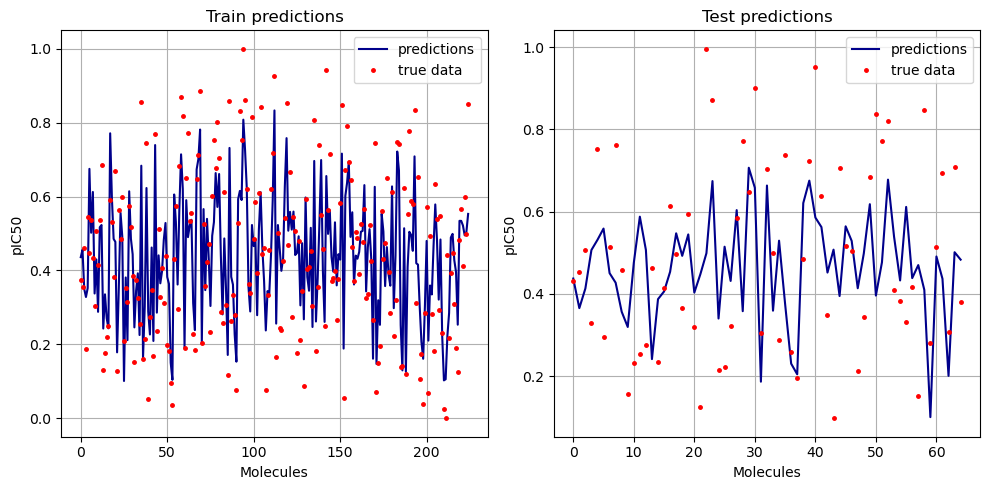

In [95]:
ridge = Ridge(alpha=2)
ridge.fit(train_X, train_Y)

pred_Y_train_ridge = ridge.predict(train_X)
pred_Y_test_ridge = ridge.predict(test_X)

evaluate(train_Y, pred_Y_train_ridge, test_Y, pred_Y_test_ridge)
visualizeTrainTest(train_Y, pred_Y_train_ridge, test_Y, pred_Y_test_ridge)

### XGBoost

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=50, reg_lambda=1, subsample=0.9; total time=   6.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=50, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=50, reg_lambda=1, subsample=0.9; total time=   7.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=50, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=50, reg_lambda=1, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=50, reg_lambda=5, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=50, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=0.3, le

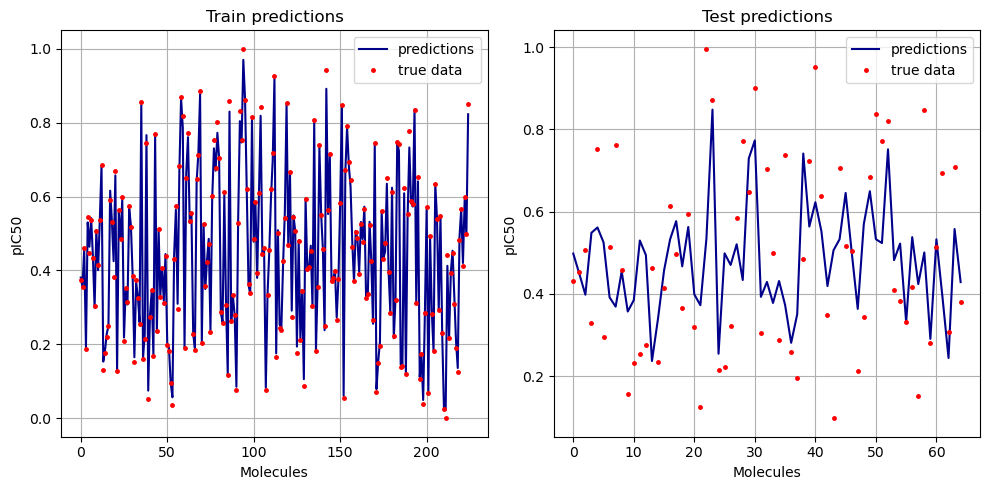

In [9]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

train_X, train_Y, test_X, test_Y = load_data(train_DL, test_DL)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 10],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.3, 0.65, 1.0],
    'subsample': [0.8, 0.9, 1.0],
    'reg_lambda': [1, 5]
}

xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(
    estimator=xg_reg,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(train_X, train_Y)

print("Best Hyperparameters:", grid_search.best_params_)

best_xg_reg = grid_search.best_estimator_

pred_Y_train_xgb = best_xg_reg.predict(train_X)
pred_Y_test_xgb = best_xg_reg.predict(test_X)

evaluate(train_Y, pred_Y_train_xgb, test_Y, pred_Y_test_xgb)
visualizeTrainTest(train_Y, pred_Y_train_xgb, test_Y, pred_Y_test_xgb)